In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [66]:
import warnings

warnings.filterwarnings('ignore')

In [67]:
dados = pd.read_csv(
    r"D:\tensorflowteste\data-science\reg-linear\Dados\Consumo_cerveja.csv",sep=";")

In [68]:
dados['data'] = pd.to_datetime(dados['data'],errors='coerce')

In [69]:
dados.describe()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
count,144,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2015-06-22 00:00:00,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
min,2015-01-01 00:00:00,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,2015-03-27 00:00:00,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,2015-06-21 12:00:00,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,2015-09-16 18:00:00,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,2015-12-12 00:00:00,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000
std,NaN,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703


In [70]:
dados.corr().round(4)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
data,1.0000,-0.0705,-0.0435,-0.0954,0.0325,-0.0004,-0.0350
temp_media,-0.0705,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,-0.0435,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,-0.0954,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0325,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0004,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,-0.0350,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


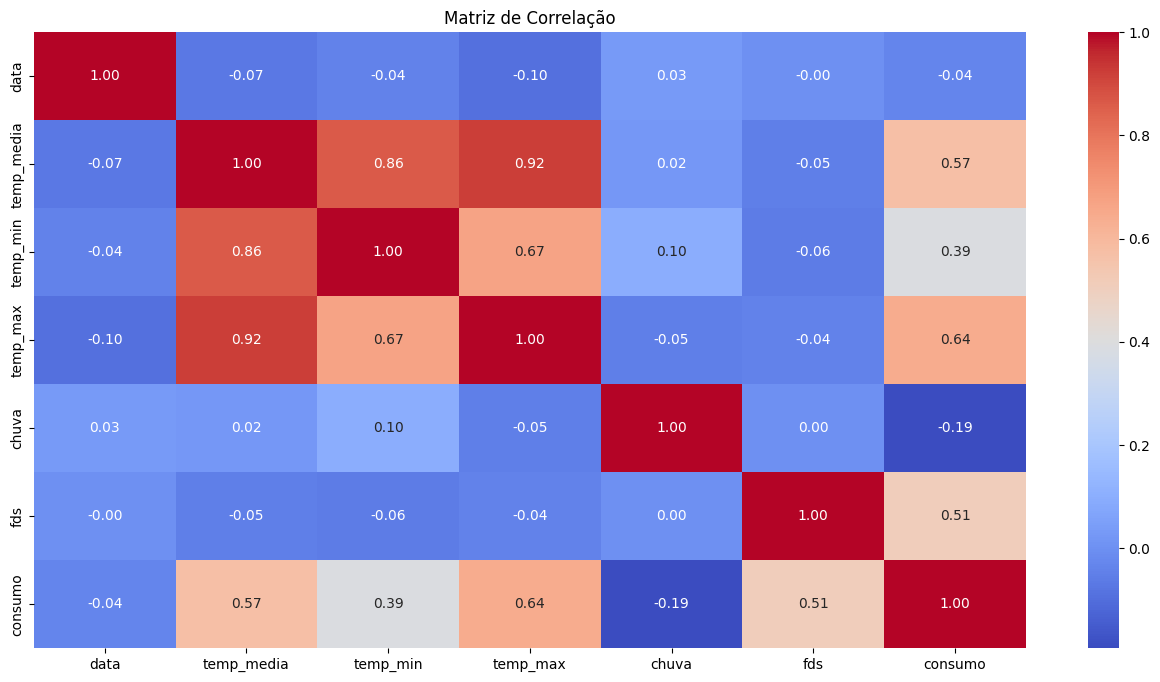

In [71]:
plt.figure(figsize=(16, 8))
sns.heatmap(data=dados.corr().round(4), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

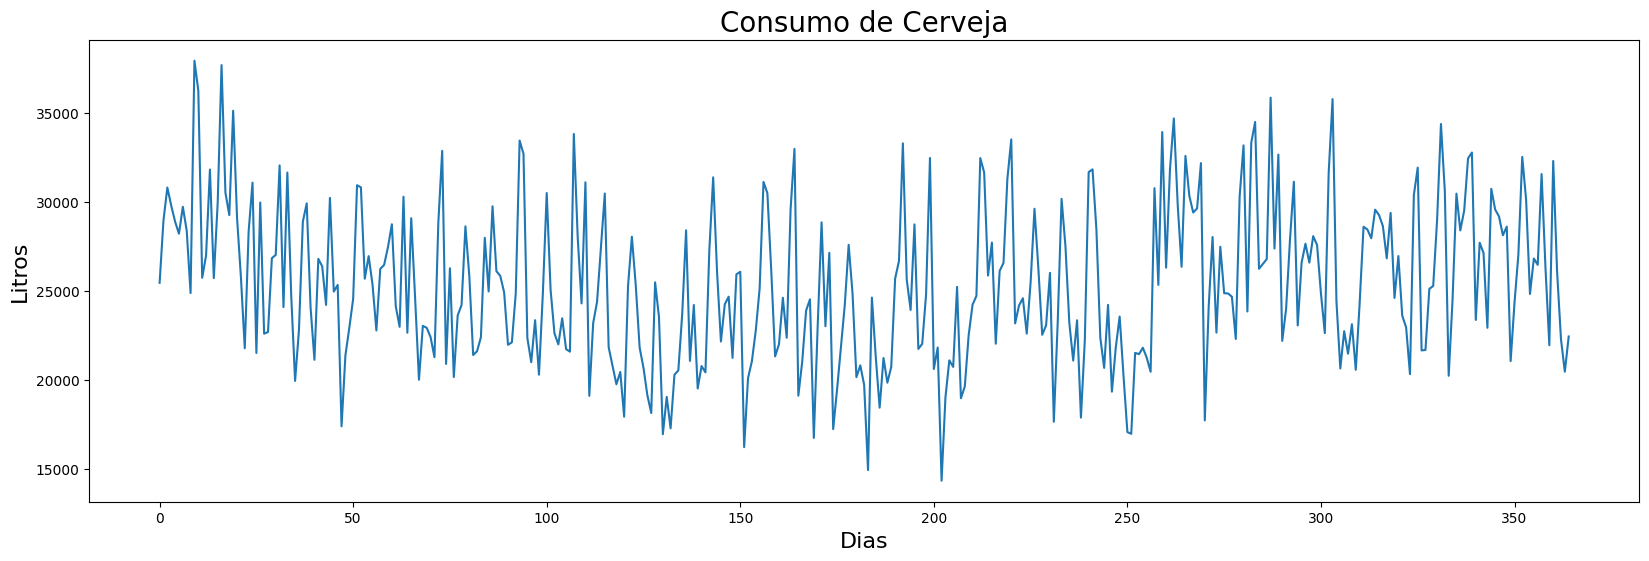

In [72]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot()

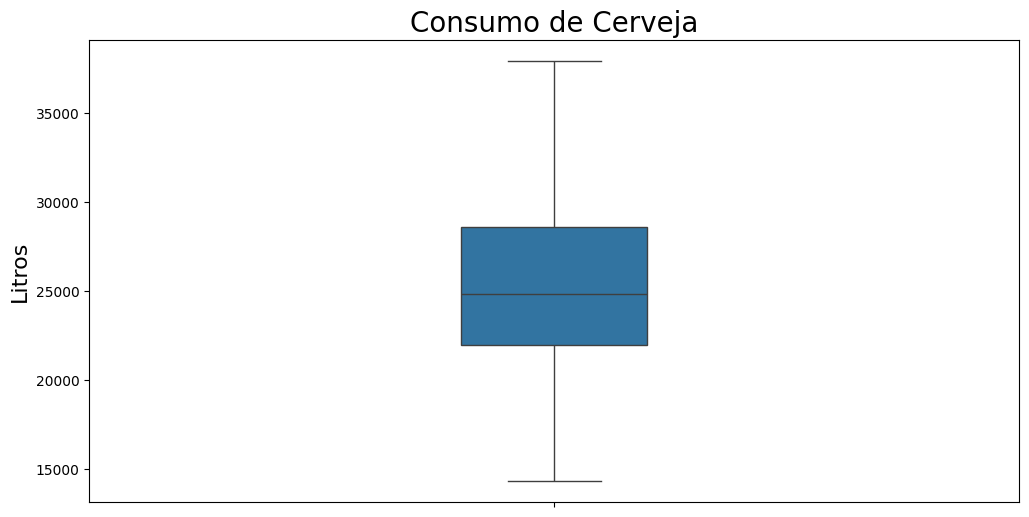

In [73]:
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax=ax

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

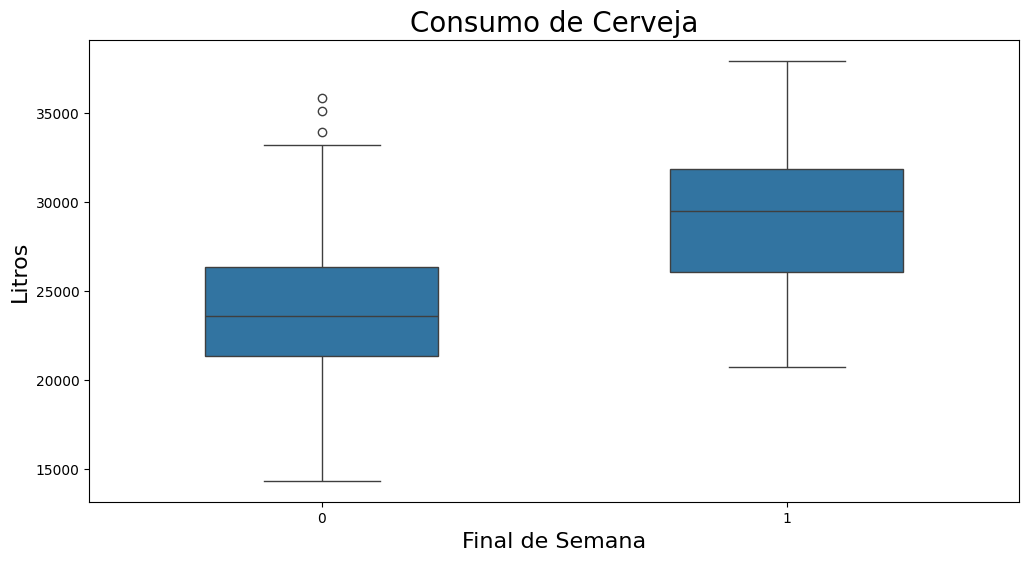

In [74]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

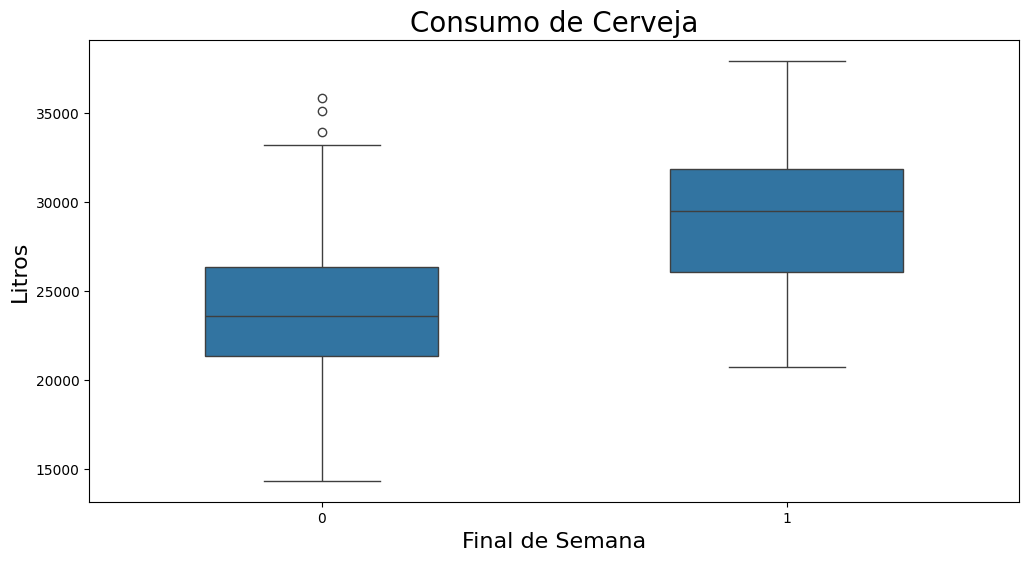

In [75]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

<Axes: title={'center': 'Distrubuição de Frequências'}, xlabel='consumo', ylabel='Consumo de Cerveja(Litros)'>

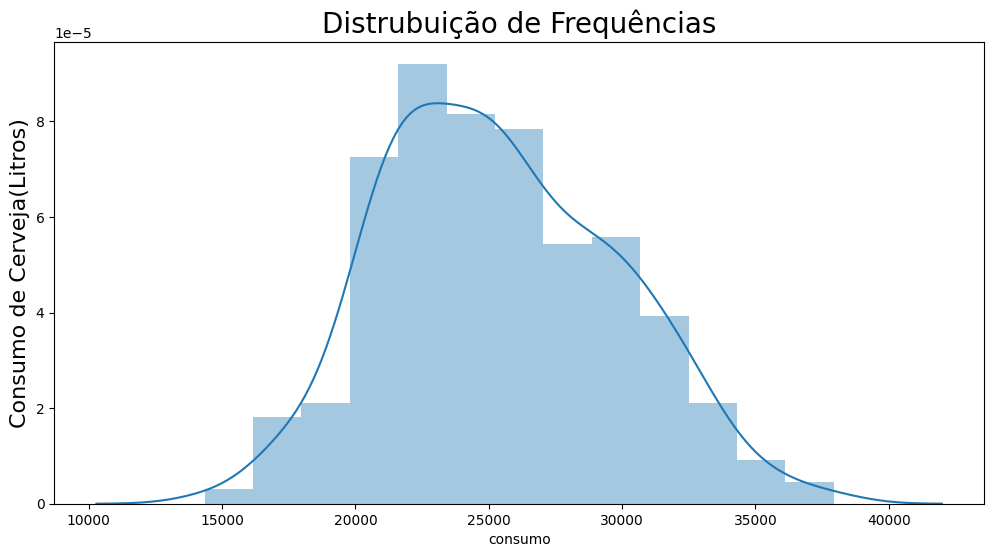

In [76]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Litros', ylabel='Final de Semana'>

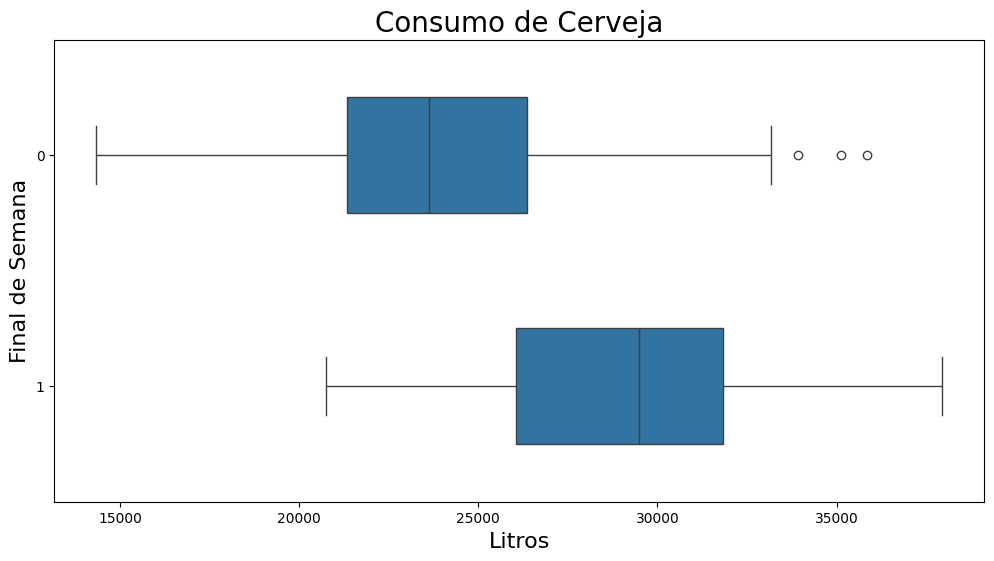

In [77]:
ax = sns.boxplot(y='fds', x='consumo', data=dados, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Litros', fontsize=16)
ax.set_ylabel('Final de Semana', fontsize=16)
ax

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
y = dados['consumo']

In [80]:
X = dados[['temp_max', 'chuva', 'fds']]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [83]:
"""Regressão Linear"""

'Regressão Linear'

In [84]:
modelo = LinearRegression()

In [85]:
modelo.fit(X_train, y_train)

LinearRegression()

In [86]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


In [87]:
y_previsto = modelo.predict(X_test)

In [88]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))


R² = 0.69


In [89]:
print('R² = %s'% metrics.r2_score(y_test, y_previsto))

R² = 0.690736466775069


In [90]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [91]:
modelo.predict(entrada)

array([26094.90177526])

In [92]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


In [93]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]
entrada

[[40, 0, 1]]

In [94]:
"""Empilhamento"""

'Empilhamento'

In [95]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV


estimators = [
    ('GradientBoostingRegressor', GradientBoostingRegressor(n_estimators=140, max_depth=3)),
    ('HistGradientBoostingRegressor', HistGradientBoostingRegressor(max_iter=250, max_depth=5)),
    ('MLPRegressor', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=550, activation='relu')),
    ('RandomForestRegressor', RandomForestRegressor(n_estimators=120, max_depth=5)),
    ('XGBRegressor', XGBRegressor(n_estimators=150, max_depth=3)),
    ('LinearRegression', LinearRegression()) 
]

final_estimator = GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)


reg.fit(X_train, y_train) 


modelo = reg.predict(entrada)[0]
modelo


30689.36584587803

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))


In [98]:
print('R² = %s'% metrics.r2_score(y_test, y_previsto))

R² = 0.690736466775069
